In [1]:
import datetime as dt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

# Import training datasets

In [2]:
historic_df = pd.read_csv('datasets/historic_data.csv')
historic_df = historic_df.dropna()
historic_df.head()

,PLAYER_id,PLAYER_name,PLAYER_Team,PLAYER_position,PLAYER_GW,PLAYER_Fixture_date,PLAYER_Opponent_id,PLAYER_Opponent,FORECAST,FIX_Home?,...,LSS_df_avg_influence,LSS_df_avg_threat,LSS_df_avg_GK_saves,LSS_df_avg_GK_DEF_goals_conceded,LSS_df_avg_GK_DEF_MID_clean_sheets,LSS_df_avg_selected_by,LSS_df_avg_cost,LSS_df_no_player_history,TARGET_minutes,TARGET_total_points
4,534,Aaron_Connolly_534,Brighton,4,8,2019-10-05,17,Spurs,0,1,...,7.931868,12.164835,0.0,0.527473,0.131868,167753.065934,59.615385,1.0,79.0,13.0
5,534,Aaron_Connolly_534,Brighton,4,9,2019-10-19,2,Aston Villa,0,0,...,7.931868,12.164835,0.0,0.527473,0.131868,167753.065934,59.615385,1.0,45.0,1.0
6,534,Aaron_Connolly_534,Brighton,4,10,2019-10-26,8,Everton,0,1,...,7.931868,12.164835,0.0,0.527473,0.131868,167753.065934,59.615385,1.0,79.0,8.0
7,534,Aaron_Connolly_534,Brighton,4,11,2019-11-02,14,Norwich,0,1,...,7.931868,12.164835,0.0,0.527473,0.131868,167753.065934,59.615385,1.0,85.0,2.0
8,534,Aaron_Connolly_534,Brighton,4,12,2019-11-10,12,Man Utd,0,0,...,7.931868,12.164835,0.0,0.527473,0.131868,167753.065934,59.615385,1.0,45.0,1.0


In [61]:
historic_df_KEEPER = historic_df.loc[historic_df['PLAYER_position'] == 1]
historic_df_DEF = historic_df.loc[historic_df['PLAYER_position'] == 2]
historic_df_MID = historic_df.loc[historic_df['PLAYER_position'] == 3]
historic_df_FOR = historic_df.loc[historic_df['PLAYER_position'] == 4]

In [4]:
historic_df_FOR = historic_df_FOR.drop(columns = [c for c in historic_df_FOR.columns if "clean" in c])
historic_df_FOR = historic_df_FOR.drop(columns = [c for c in historic_df_FOR.columns if "conceded" in c])
historic_df_FOR = historic_df_FOR.drop(columns = [c for c in historic_df_FOR.columns if "save" in c])

historic_df_MID = historic_df_MID.drop(columns = [c for c in historic_df_MID.columns if "conceded" in c])
historic_df_MID = historic_df_MID.drop(columns = [c for c in historic_df_MID.columns if "save" in c])

historic_df_DEF = historic_df_DEF.drop(columns = [c for c in historic_df_DEF.columns if "save" in c])

# Feature importance

In [71]:
def assess_feat_importance(df, X_cols=('FIX', 'LW', 'L4W', 'TSS', 'LSS'), y_cols='TARGET_total_points', plot = True, suppress_return = False):

    X = df[[c for c in df.columns if str.startswith(c, X_cols)]]
    y = df[y_cols]

    model = ExtraTreesClassifier()
    model.fit(X, y)

    feat_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

    if plot:
    # plot graph of feature importances for better visualization
        fig = plt.figure(figsize=[25, 6])
        ax = fig.add_subplot(111)
        ax.plot(feat_importances)
        ax.tick_params(axis='x', rotation=90)
        ax.set_xlim(-1, X.shape[1])
        ax.grid()

        plt.show()

    if suppress_return == False:
        return feat_importances
    

In [ ]:
def get_columns_to_use(feature_ranking,rank_cutoff,required_prefix = None):
    
    prefix_columns = [c for c in feature_ranking.index if str.startswith(c, required_prefix)]
    
    model_columns = prefix_columns 
    feature_ranking = feature_ranking.drop(columns = model_columns)

## Goalkeeper

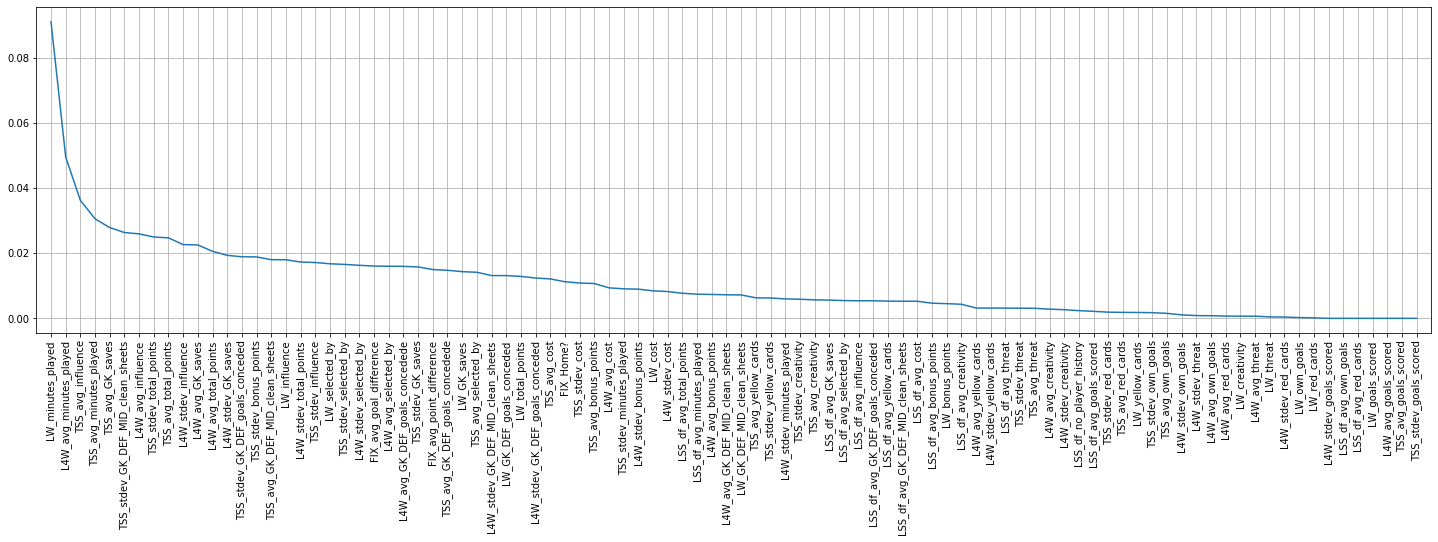

In [72]:
feature_ranking_KEEPER = assess_feat_importance(historic_df_KEEPER)

In [70]:
feature_ranking_KEEPER.iloc[:10]

LW_minutes_played                    0.069081
TSS_avg_influence                    0.034964
L4W_avg_minutes_played               0.032569
TSS_stdev_GK_DEF_MID_clean_sheets    0.032363
TSS_avg_minutes_played               0.032347
L4W_stdev_influence                  0.027669
TSS_avg_total_points                 0.026346
L4W_avg_total_points                 0.025981
L4W_stdev_GK_saves                   0.024871
LW_total_points                      0.023842
dtype: float64

## Defender

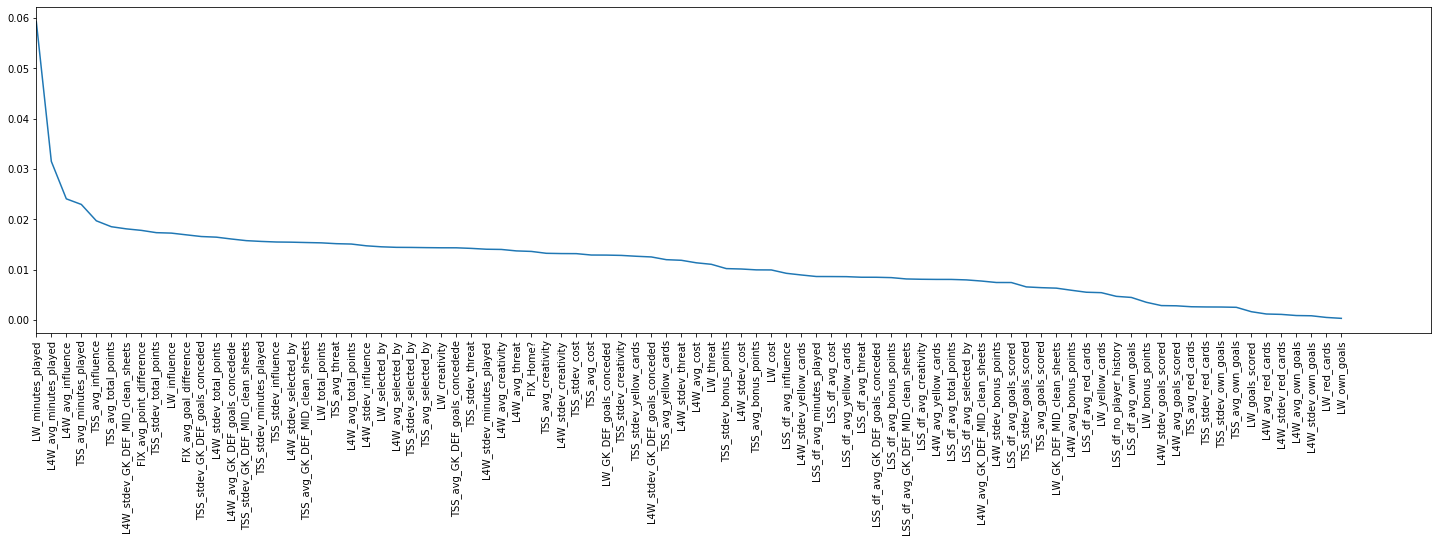

LW_minutes_played                     0.059275
L4W_avg_minutes_played                0.031523
L4W_avg_influence                     0.024076
TSS_avg_minutes_played                0.022964
TSS_avg_influence                     0.019708
TSS_avg_total_points                  0.018532
L4W_stdev_GK_DEF_MID_clean_sheets     0.018105
FIX_avg_point_difference              0.017806
TSS_stdev_total_points                0.017350
LW_influence                          0.017260
FIX_avg_goal_difference               0.016917
TSS_stdev_GK_DEF_goals_conceded       0.016581
L4W_stdev_total_points                0.016456
L4W_avg_GK_DEF_goals_concedede        0.016089
TSS_stdev_GK_DEF_MID_clean_sheets     0.015762
TSS_stdev_minutes_played              0.015607
TSS_stdev_influence                   0.015493
L4W_stdev_selected_by                 0.015458
TSS_avg_GK_DEF_MID_clean_sheets       0.015386
LW_total_points                       0.015323
TSS_avg_threat                        0.015159
L4W_avg_total

In [42]:
assess_feat_importance(historic_df_DEF, suppress_return=True)

## Midfielder

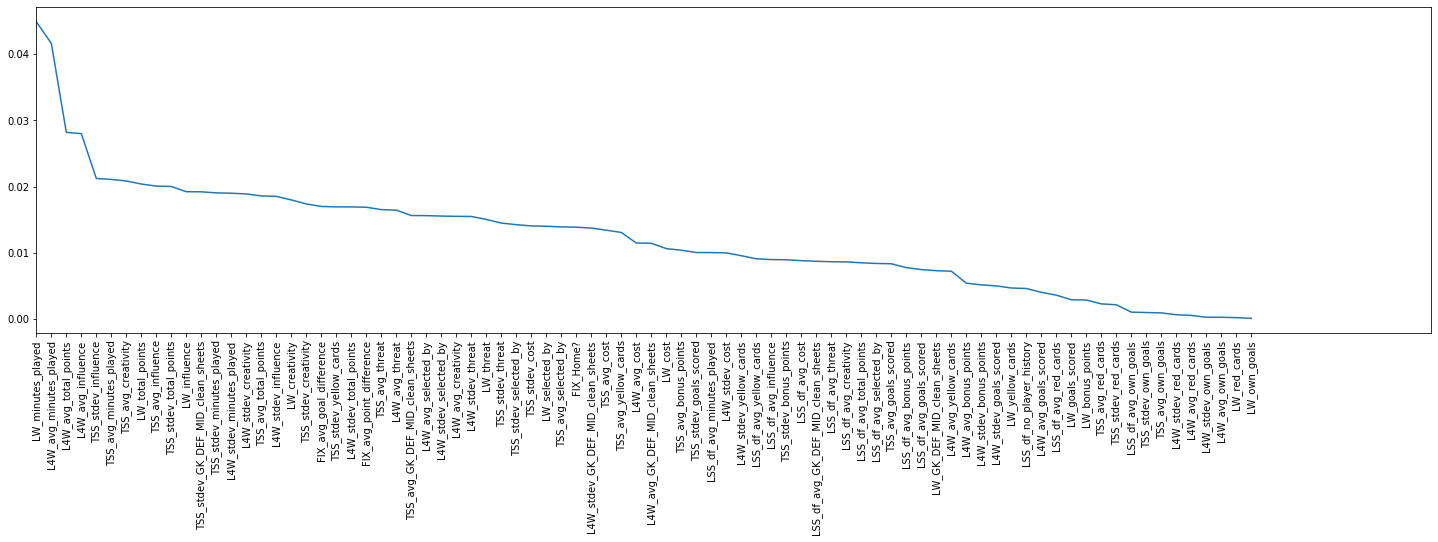

LW_minutes_played                     0.044898
L4W_avg_minutes_played                0.041651
L4W_avg_total_points                  0.028193
L4W_avg_influence                     0.027996
TSS_stdev_influence                   0.021219
TSS_avg_minutes_played                0.021080
TSS_avg_creativity                    0.020848
LW_total_points                       0.020386
TSS_avg_influence                     0.020071
TSS_stdev_total_points                0.020014
LW_influence                          0.019221
TSS_stdev_GK_DEF_MID_clean_sheets     0.019211
TSS_stdev_minutes_played              0.019044
L4W_stdev_minutes_played              0.018995
L4W_stdev_creativity                  0.018890
TSS_avg_total_points                  0.018587
L4W_stdev_influence                   0.018522
LW_creativity                         0.017984
TSS_stdev_creativity                  0.017377
FIX_avg_goal_difference               0.016999
TSS_stdev_yellow_cards                0.016931
L4W_stdev_tot

In [43]:
assess_feat_importance(historic_df_MID, suppress_return=True)

## Forward

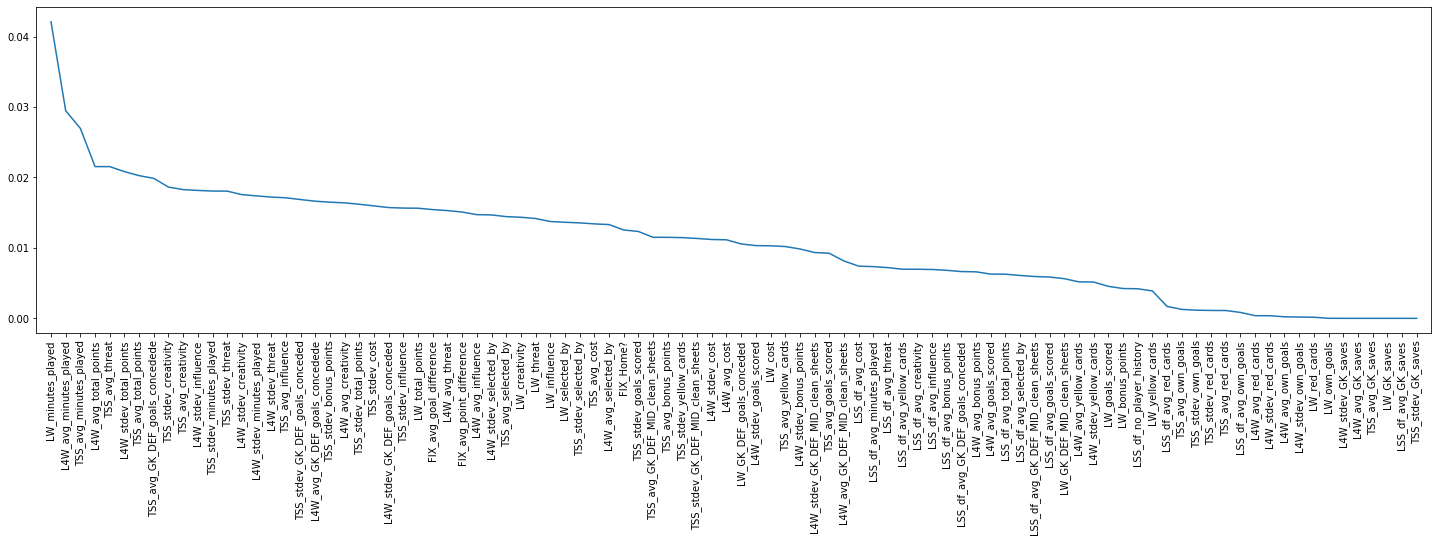

In [63]:
assess_feat_importance(historic_df_FOR, suppress_return=True)